In [42]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
#!Conv2D (Convolutional) เป็นเลเยอร์ที่จะเก็บข้อมูล(จำจุดเด้น)ของแต่ละส่วนของภาพ
# Convolutional Parameter : 
#   1. Kernal size (w,h) : ขนาดในการเก็บข้อมูลเป็นข้อมูลของแต่ละชุด Pixel ตามขนาดที่กำหนดไว้ กว้าง x ยาว โดยทั่วไปมักจะให้เป็นสี่่เหลี่ยมจัตุรัส
#   2. Stride (n) : โดย n จะเป็นค่าที่บอกว่าหลังจากเก็บข้อมูล ครั้งถัดไปจะต้องเลื่อนไปกี่ Pixel จากก่อนหน้านี้

#!Pooling : เป็นเลเยอร์ที่จะย่อขนาดภาพจากส่วนที่ดึงออกมา โดยจะมี 2 แบบหลัก คือ 1) MaxPooling ก็คือหาค่ามากสุดในกลุ่มที่ดึงออกมา 2) AveragePooling ก็คือหาค่าเฉลี่ยในกลุ่มที่ดึงออกมา
# Pooling Parameter : คล้ายกับ Conv
#   1. Pool size (w,h) : ขนาดส่วนของภาพที่ต้องการย่อให้เหลือจุดเดียว
#   2. Stride (n) : คล้ายกับ Conv ที่จะเช็คส่วนทัดไปต้องเลื่อนไกลแค่ไหน แต่ส่วนใหญ่มักจะเท่ากับ w ของ size เนื่องจากจะทำให้แต่ละส่วนแยกออกจากกับ(ไปทับกันเอง)

#!Dropout : คือเลเยอร์ที่มีหน้าที่ในการป้องกันปัญหาของโมเดลที่เรียนรู้จนเกินไป(Overfitting) โดยการทำการสุ่มเลือก Neuron บางส่วนในเครือข่ายไม่ให้รับข้อมูลใดๆ ในระหว่างการเทรน
# Dropout Parameter : 
#   Dropout Ratio  : ก็คือจะสุ่มลบออกกี่เปอร์ จาก layer ก่อนหน้า

#!Dense : เป็นเลเยอร์ที่มีหน้าที่เชื่อมต่อ Neuron ในชั้นก่อนหน้าเข้ากับ Neuron ในชั้นถัดไปแบบเต็มรูปแบบ (Fully Connected)
# Dense Parameter : 
#!units: Positive integer, dimensionality of the output space.
# activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
# use_bias: Boolean, whether the layer uses a bias vector.
# kernel_initializer: Initializer for the kernel weights matrix.
# bias_initializer: Initializer for the bias vector.
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
# bias_regularizer: Regularizer function applied to the bias vector.
# activity_regularizer: Regularizer function applied to the output of the layer (its "activation").
# kernel_constraint: Constraint function applied to the kernel weights matrix.
# bias_constraint: Constraint function applied to the bias vector.
# lora_rank: Optional integer. If set, the layer's forward pass will implement LoRA (Low-Rank Adaptation) with the provided rank. LoRA sets the layer's kernel to non-trainable and replaces it with a delta over the original kernel, obtained via multiplying two lower-rank trainable matrices. This can be useful to reduce the computation cost of fine-tuning large dense layers. You can also enable LoRA on an existing Dense layer by calling layer.enable_lora(rank).


#!Flatten : ใช้เปลี่ยนรูปแบบข้อมูลจาก 2D หรือ 3D tensor ที่ได้จาก Convolutional layer ให้เป็น 1D vector ก่อนที่จะส่งเข้าสู่ Dense layer!!!


In [44]:
Charmander = 'mainset/Charmander'   #0
Pikachu = 'mainset/Pikachu'         #1

char_images = []
pika_images = []
target_size = (128, 128)

for filename in os.listdir(Charmander):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(Charmander, filename))
        img = cv2.resize(img, target_size)
        char_images.append(img)

# Loop through the files in folder2        
for filename in os.listdir(Pikachu):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(Pikachu, filename))
        img = cv2.resize(img, target_size)
        pika_images.append(img)


In [45]:

images = char_images + pika_images
label = []
for i in range(80):
    label.append([1,0])
for i in range(80):
    label.append([0,1])
print("Num of Imgs",images.__len__())
print("Num of Labs",label.__len__())
x_train,x_test,y_train,y_test = train_test_split(images, label, random_state=42,test_size=0.2)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train.shape,x_test.shape,y_train.shape,y_test.shape

Num of Imgs 160
Num of Labs 160


((128, 128, 128, 3), (32, 128, 128, 3), (128, 2), (32, 2))

In [46]:
model = keras.Sequential([
            keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(128,128,3)),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Conv2D(128, (3,3), activation='relu'),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(2, activation='softmax')
        ])
model.summary()

c:\Users\Bean\Anaconda3\envs\ML1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │       230,402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381,570 (1.46 MB)

 Trainable params: 381,570 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics= ['accuracy'])
batch_size = 32
epochs = 8

In [48]:
history = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))

Epoch 1/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.4396 - loss: 1.8020 - val_accuracy: 0.5625 - val_loss: 0.6483
Epoch 2/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 414ms/step - accuracy: 0.5813 - loss: 0.6336 - val_accuracy: 0.7188 - val_loss: 0.5832
Epoch 3/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.8219 - loss: 0.5025 - val_accuracy: 0.8438 - val_loss: 0.4265
Epoch 4/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.8490 - loss: 0.3379 - val_accuracy: 0.8438 - val_loss: 0.3363
Epoch 5/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 0.9156 - loss: 0.2126 - val_accuracy: 0.9375 - val_loss: 0.1793
Epoch 6/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 0.9542 - loss: 0.1183 - val_accuracy: 0.9688 - val_loss: 0.1013
Epoch 7/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step - accuracy: 0.9708 - loss: 0.0660 - val_accuracy: 1.0000 - val_loss: 0.0653
Epoch 8/8
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.9854 - loss: 0.0391 - val_accuracy: 0.9688 - val_loss: 0.0638


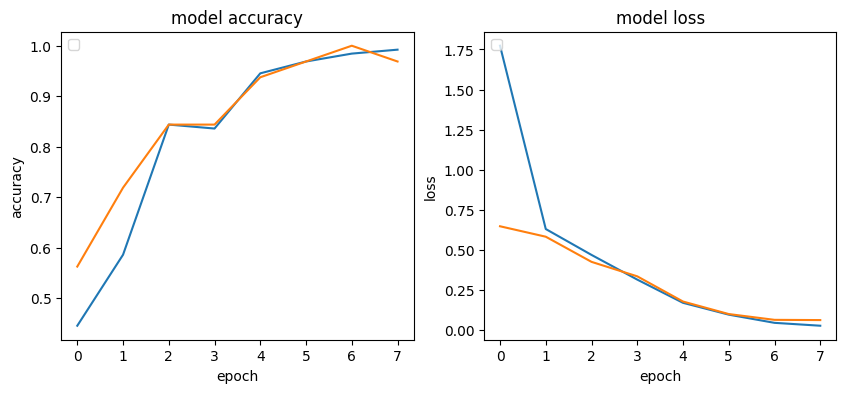

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(121),
plt.title('model accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.subplot(122)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [55]:
model.save('model.h5')

In [50]:
class_names = ['Charmander', 'Pikachu']

In [51]:
# Test Charmander from base data
T = 0
F = 0
for filename in os.listdir(Charmander):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        test_img = cv2.imread(os.path.join(Charmander, filename))
        test_img = cv2.resize(test_img, target_size)
        rimg1 = np.array(test_img)
        rimg1 = rimg1.astype('float32')  # normalize pixel values
        rimg1 /= 255
        rimg1 = np.expand_dims(rimg1, axis=0)
        prediction = model.predict(rimg1)
        # print(prediction)
        predicted_class = class_names[np.argmax(prediction)]
        print(f"Predicted class: {predicted_class}")
        if predicted_class == 'Charmander':
            T += 1
        else:
            F += 1

print((T/(T+F))*100)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Charmander
1/1 ━━━━━━

In [52]:
# Test Pikachu from base data
T = 0
F = 0
for filename in os.listdir(Pikachu):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        test_img = cv2.imread(os.path.join(Pikachu, filename))
        test_img = cv2.resize(test_img, target_size)
        rimg2 = np.array(test_img)
        rimg2 = rimg2.astype('float32')  # normalize pixel values
        rimg2 /= 255
        rimg2 = np.expand_dims(rimg2, axis=0)
        prediction = model.predict(rimg2)
        # print(prediction)
        predicted_class = class_names[np.argmax(prediction)]
        print(f"Predicted class: {predicted_class}")
        if predicted_class == 'Pikachu':
            T += 1
        else:
            F += 1

print((T/(T+F))*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Pikachu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: 

In [59]:
#Test other images that not from main dateset
char_img = cv2.imread('test_model/Charmander.jpg')
char_img = cv2.resize(char_img, (128, 128))
char_rimg = np.array(char_img)
char_rimg = char_rimg.astype('float32')  # normalize pixel values
char_rimg /= 255
char_rimg = np.expand_dims(char_rimg, axis=0)
prediction = model.predict(char_rimg)
# print(prediction)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")


pika_img = cv2.imread('test_model/PikaPika.jpg')
pika_img = cv2.resize(pika_img, (128, 128))
pika_rimg = np.array(pika_img)
pika_rimg = pika_rimg.astype('float32')  # normalize pixel values
pika_rimg /= 255
pika_rimg = np.expand_dims(pika_rimg, axis=0)
prediction = model.predict(pika_rimg)
# print(prediction)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Charmander
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Pikachu
